In [18]:
import pandas as pd
import numpy as np
import graphviz
import os
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [19]:
#Citire data set
input_file = "chess_games_2.csv"
data = pd.read_csv(input_file, header = 0)

In [20]:
data

rated  turns time_increment  white_rating  black_rating  rank_diff  \
0      False     13           15+2          1500          1191        309   
1       True     16           5+10          1322          1261         61   
2       True     61           5+10          1496          1500         -4   
3       True     61           20+0          1439          1454        -15   
4       True     95           30+3          1523          1469         54   
...      ...    ...            ...           ...           ...        ...   
20053   True     24          10+10          1691          1220        471   
20054   True     82           10+0          1233          1196         37   
20055   True     35           10+0          1219          1286        -67   
20056   True    109           10+0          1360          1227        133   
20057   True     78           10+0          1235          1339       -104   

      opening_code  opening_moves victory_status winner  
0              D10              5    Out of Time  White  
1              B00              4         Resign  Black  
2              C20              3           Mate  White  
3              D02              3           Mate  White  
4              C41              5           Mate  White  
...            ...            ...            ...    ...  
20053          A80              2         Resign  White  
20054          A41              2           Mate  Black  
20055          D00              3           Mate  White  
20056          B07              4         Resign  White  
20057          D00              3           Mate  Black  

[20058 rows x 10 columns]

In [21]:
data_rows, data_cols = data.shape
data.shape

(20058, 10)

In [22]:
data.columns

Index(['rated', 'turns', 'time_increment', 'white_rating', 'black_rating',
       'rank_diff', 'opening_code', 'opening_moves', 'victory_status',
       'winner'],
      dtype='object')

In [23]:
data.head()

rated  turns time_increment  white_rating  black_rating  rank_diff  \
0  False     13           15+2          1500          1191        309   
1   True     16           5+10          1322          1261         61   
2   True     61           5+10          1496          1500         -4   
3   True     61           20+0          1439          1454        -15   
4   True     95           30+3          1523          1469         54   

  opening_code  opening_moves victory_status winner  
0          D10              5    Out of Time  White  
1          B00              4         Resign  Black  
2          C20              3           Mate  White  
3          D02              3           Mate  White  
4          C41              5           Mate  White

In [24]:
data.dtypes

rated               bool
turns              int64
time_increment    object
white_rating       int64
black_rating       int64
rank_diff          int64
opening_code      object
opening_moves      int64
victory_status    object
winner            object
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['opening_code']) # only for one attribute
data_encoded = le.transform(data["opening_code"])

data_encoded

array([248,  71, 171, ..., 239,  78, 239])

In [26]:
le.classes_

array(['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08',
       'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A27', 'A28',
       'A29', 'A30', 'A31', 'A33', 'A34', 'A35', 'A36', 'A38', 'A39',
       'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48',
       'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A56', 'A57', 'A58',
       'A59', 'A60', 'A65', 'A67', 'A70', 'A71', 'A73', 'A80', 'A81',
       'A82', 'A83', 'A84', 'A85', 'A89', 'A91', 'A97', 'A99', 'B00',
       'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09',
       'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B17', 'B18', 'B19',
       'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B27', 'B28', 'B29',
       'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B38', 'B39',
       'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48',
       'B50', 'B51', 'B52', 'B53', 'B54', 'B56', 'B57', 'B58', 'B60',
       'B62', 'B70',

In [27]:
data = data.apply(le.fit_transform) # for all the attributes
array = data.values
data


rated  turns  time_increment  white_rating  black_rating  rank_diff  \
0          0     12             110           616           318       1089   
1          1     15             298           438           388        841   
2          1     60             298           612           627        776   
3          1     60             187           555           581        765   
4          1     94             247           639           596        834   
...      ...    ...             ...           ...           ...        ...   
20053      1     23              21           807           347       1251   
20054      1     81              19           349           323        817   
20055      1     34              19           335           413        713   
20056      1    108              19           476           354        913   
20057      1     77              19           351           466        676   

       opening_code  opening_moves  victory_status  winner  
0               248              4               2       2  
1                71              3               3       0  
2               171              2               1       2  
3               241              2               1       2  
4               192              4               1       2  
...             ...            ...             ...     ...  
20053            61              1               3       2  
20054            37              1               1       0  
20055           239              2               1       2  
20056            78              3               3       2  
20057           239              2               1       0  

[20058 rows x 10 columns]

In [28]:
#Features
X = array[:,0:data_cols-1]
X

array([[  0,  12, 110, ..., 248,   4,   2],
       [  1,  15, 298, ...,  71,   3,   3],
       [  1,  60, 298, ..., 171,   2,   1],
       ...,
       [  1,  34,  19, ..., 239,   2,   1],
       [  1, 108,  19, ...,  78,   3,   3],
       [  1,  77,  19, ..., 239,   2,   1]], dtype=int64)

In [29]:
#Target
Y = array[:,data_cols-1]
Y

array([2, 0, 2, ..., 2, 2, 0], dtype=int64)

In [30]:
#Data exploration
import seaborn
import matplotlib.pyplot as plt
  
#seaborn.pairplot(data, hue = 'winner')
#plt.show()

<AxesSubplot:title={'center':'winning'}>

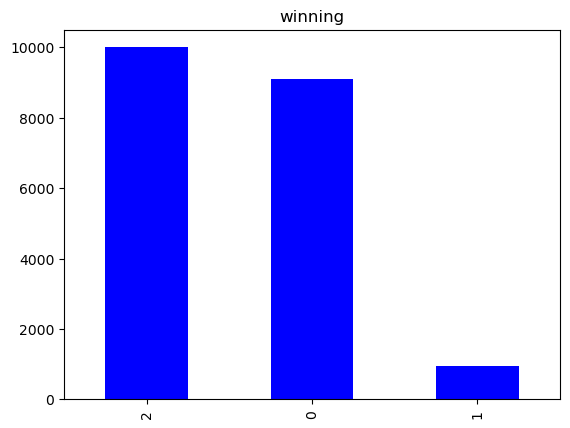

In [31]:
#Data exploration
#1=nr bancnote falsificate
#0=nr bancnote autentice
data.winner.value_counts().plot(kind="bar",color="blue",title="winning")

In [32]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")

In [33]:
#Impartire dataset: train + test
#Fit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 100)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
#Prezicere raspuns pentru dataset
#Predict
Y_prediction = model.predict(X_test)
print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
succ = 0;
fail = 0;
for i in range(0, len(Y_test)):
    if Y_prediction[i] == Y_test[i]:
        succ = succ + 1;
    else:
        fail = fail + 1;

print(succ / (succ+fail) * 100);



Y:  [2 0 2 ... 2 2 0]
Y_prediction: [2 2 0 ... 0 0 2]
Y_test: [2 2 0 ... 2 0 2]
76.8444666001994


In [35]:
import graphviz
Z= data[data.columns.drop('winner')]
dot_data = tree.export_graphviz(model, out_file = None, feature_names= Z.columns)
graph1 = graphviz.Source(dot_data)
graph1


In [36]:
#5 metrici pentru clasificatorul initial
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)


Accuracy: 0.768444666001994
Confusion matrix is :  [[1405    4  456]
 [   4  149    5]
 [ 455    5 1529]]


In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train,Y_train,cv=5)  

array([0.72523364, 0.67279526, 0.73106887, 0.74197569, 0.75070115])

In [ ]:
#GridSearch pentru imbunatatire rezultate-cautarea celor mai bune valori pentru parametri
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'),'splitter':('best', 'random') ,'max_depth':range(1,21),'min_samples_split':range(2,11)}
model3 = tree.DecisionTreeClassifier()
clf = GridSearchCV(model3, parameters)
clf.fit(X, Y)

In [ ]:
clf.best_params_

In [ ]:
clf.cv_results_

# Schimbare parametrii pentru a imbunatati performanta

In [ ]:
from sklearn.metrics import f1_score
#Schimbare parametrii pentru a imbunatati performanta
#Valorile pentru parametrii sunt cei gasiti de GridSearch

clf.fit(X_train,Y_train)
Y_prediction = clf.predict(X_test)
print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
print("Metricile dupa setarea parametrilor optimi:")
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

In [ ]:
#Cross-validation pentru modelul cu parametrii gasiti de GridSearch
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X,Y,cv=2)

# Vizualizare rezultate obtinute cu parametri diferiti

In [ ]:
#Vizualizare rezultate obtinute cu parametri diferiti
%matplotlib inline
import matplotlib.pyplot as plt
scores = {}
scores_list = []
#Parametrul max_depth variaza intre 1-10
maxdepth=range(1,10)

for k in maxdepth:
   classifier = tree.DecisionTreeClassifier(max_depth=k)
   classifier.fit(X_train, Y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,y_pred)
   scores_list.append(metrics.accuracy_score(Y_test,y_pred))

plt.plot(maxdepth,scores_list)
plt.xlabel("Depth of the decision tree")
plt.ylabel("Accuracy")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
scores = {}
scores_list = []
#Parametrul max_depth variaza intre 2-6
criterion=["gini","entropy"]

for k in criterion:
   classifier = tree.DecisionTreeClassifier(criterion=k)
   classifier.fit(X_train, Y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,y_pred)
   scores_list.append(metrics.accuracy_score(Y_test,y_pred)) 

plt.bar(criterion,scores_list,width=0.2,color='blue')
plt.xlabel("Criterion")
plt.ylabel("Accuracy")
plt.ylim((0.97,1))
plt.show()

